Soal 1
Saya Saya bersumpah bahwa saya mengerjakan ini dengan jujur

In [1]:
#Soal 1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score




In [2]:
df = pd.read_csv("C:\\Users\\LENOVO\\Downloads\\Advertising.csv")
df = df.drop(columns=["Unnamed: 0"])

In [3]:
#a
print(df.head())
print(df.shape)
print("Jumlah data duplikat: ", df.duplicated().sum())
print(df.isna().sum())
print(df.describe())
df.info()

      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3    9.3
3  151.5   41.3       58.5   18.5
4  180.8   10.8       58.4   12.9
(200, 4)
Jumlah data duplikat:  0
TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64
               TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   14.022500
std     85.854236   14.846809   21.778621    5.217457
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   10.375000
50%    149.750000   22.900000   25.750000   12.900000
75%    218.825000   36.525000   45.100000   17.400000
max    296.400000   49.600000  114.000000   27.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200

Beberapa statistik yang perlu diperhatikan:
1. Count: Jumlah data yang valid (tidak ada missing value) di tiap kolom.

2. Std (Standar Deviasi): Mengukur sebaran data dari rata-rata. Semakin besar, data semakin tersebar.
TV: 85.85 (iklan TV bervariasi cukup besar)
Radio: 14.85 (variasi iklan radio cukup kecil)
Newspaper: 21.77 (variasi iklan koran sedang)
Sales: 5.22 (variasi penjualan tidak terlalu besar)

3. Min & Max
Nilai terkecil dan terbesar di setiap kolom:
TV: 0.7-296.4 (range cukup luas, beberapa iklan TV sangat kecil, beberapa besar).
Radio: 0-49.6
Newspaper: 0.3-114.0
Sales: 1.6-27.0
Menunjukkan adanya perbedaan besar antar iklan dan penjualan.

🔹 Interpretasi

Iklan TV nilai maksimum jauh lebih tinggi dari rata-rata, menandakan kemungkinan besar iklan sukses.

Radio dan koran lebih sedikit (std lebih kecil).

Penjualan rata-rata sekitar 14, dengan sebagian besar data berkisar 10–17.

Dapat dilakukan regresi untuk memprediksi nilai variabel dependen Sales dengan
variabel independen TV


In [4]:
# Variabel independen (X) dan dependen (y)
X = df[["TV"]]
y = df["Sales"]


In [5]:
#b
model = LinearRegression()
model.fit(X, y)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [6]:
slope = model.coef_[0]
intercept = model.intercept_
print(f"Intercept (β₀): {intercept}")
print(f"Slope (β₁): {slope}")

Intercept (β₀): 7.032593549127695
Slope (β₁): 0.04753664043301975


Intercept menunjukkan nilai prediksi Y ketika X = 0. Jika biaya iklan TV = 0, maka penjualan diprediksi 7.03.
Slope menunjukkan seberapa besar perubahan Y ketika X naik 1 satuan. Artinya, setiap kenaikan biaya iklan TV sebesar 1 akan meningkatkan penjualan sebesar 0.0475.

In [8]:
y_pred = model.predict(X)


In [9]:
# Menghitung R², MSE, dan RMSE
r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)

In [10]:
print(f"R-squared: {r2:.3f}")
print(f"MSE: {mse:.3f}")
print(f"RMSE: {rmse:.3f}")

R-squared: 0.612
MSE: 10.513
RMSE: 3.242


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_3364\1072243772.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


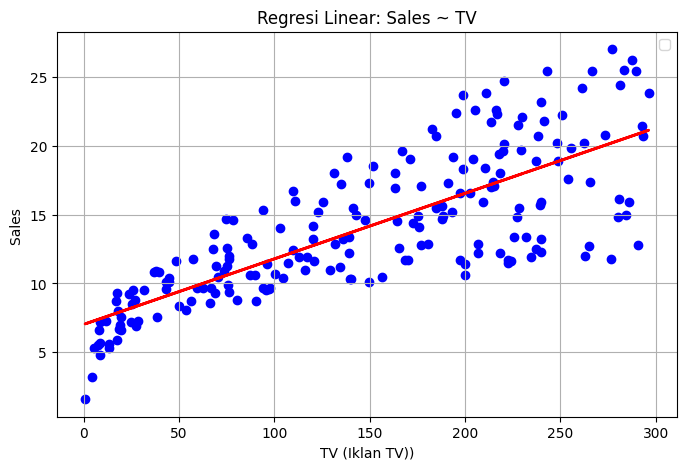

In [11]:
plt.figure(figsize=(8, 5))
plt.scatter(X, y, color='blue')
plt.plot(X, y_pred, color='red', linewidth=2)
plt.title("Regresi Linear: Sales ~ TV")
plt.xlabel("TV (Iklan TV))")
plt.ylabel("Sales ")
plt.legend()
plt.grid(True)
plt.show()

Soal 3
Saya bersumpah bahwa saya mengerjakan ini dengan jujur

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

data = pd.read_csv("C:\\Users\\LENOVO\\Downloads\\Ice_cream selling data.csv")

print(data.head())
print(data.tail())
print("Jumlah null values:\n", data.isnull().sum())
print("Dimensi data:", data.shape)
print("Jumlah duplikat:", data.duplicated().sum())



   Temperature (°C)  Ice Cream Sales (units)
0         -4.662263                41.842986
1         -4.316559                34.661120
2         -4.213985                39.383001
3         -3.949661                37.539845
4         -3.578554                32.284531
    Temperature (°C)  Ice Cream Sales (units)
44          3.610778                28.912188
45          3.704057                17.843957
46          4.130868                34.530743
47          4.133534                27.698383
48          4.899032                41.514822
Jumlah null values:
 Temperature (°C)           0
Ice Cream Sales (units)    0
dtype: int64
Dimensi data: (49, 2)
Jumlah duplikat: 0


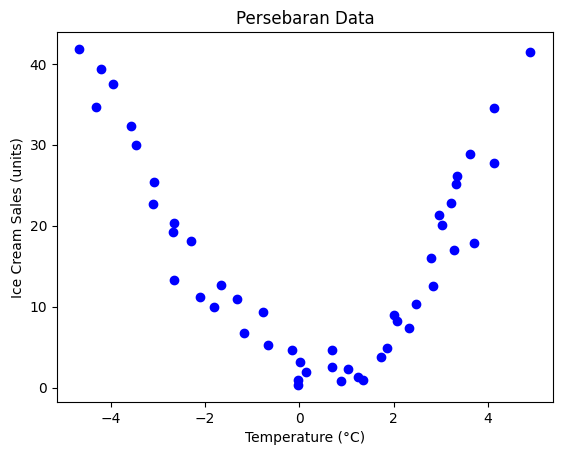

In [14]:
plt.scatter(data['Temperature (°C)'], data['Ice Cream Sales (units)'], color='blue')
plt.title('Persebaran Data')
plt.xlabel('Temperature (°C)')
plt.ylabel('Ice Cream Sales (units)')
plt.show()

In [15]:
X = data[['Temperature (°C)']].values
y = data['Ice Cream Sales (units)'].values

lin_reg = LinearRegression()
lin_reg.fit(X, y)
y_pred_lin = lin_reg.predict(X)


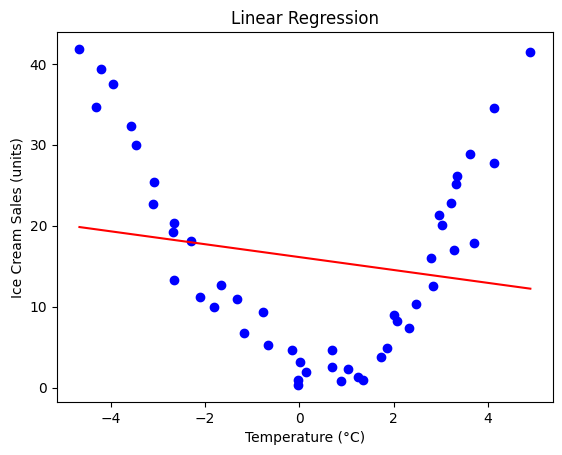

In [16]:
plt.scatter(X, y, color='blue')
plt.plot(X, y_pred_lin, color='red')
plt.title('Linear Regression')
plt.xlabel('Temperature (°C)')
plt.ylabel('Ice Cream Sales (units)')
plt.show()

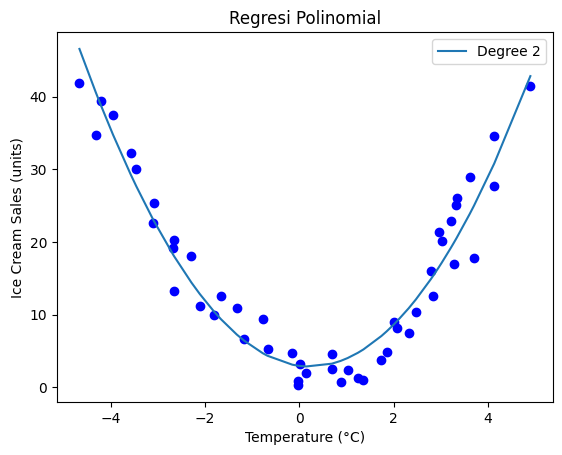

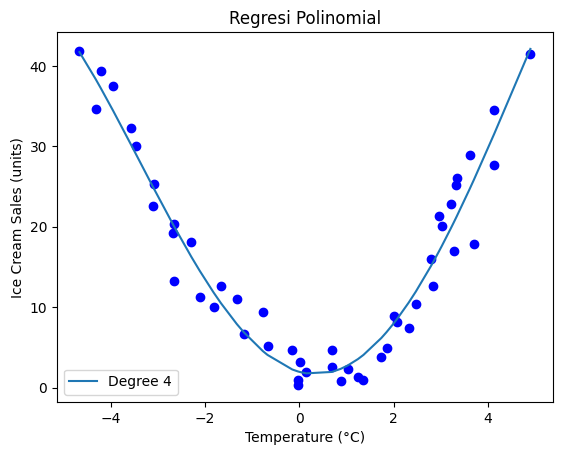

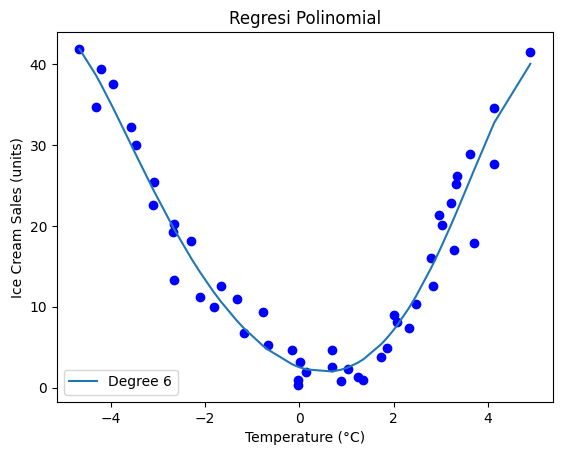

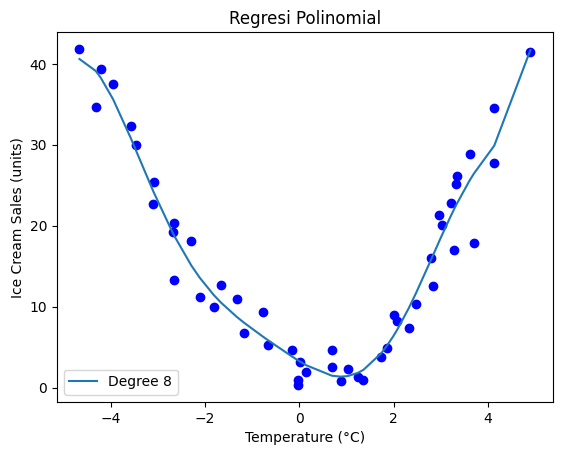

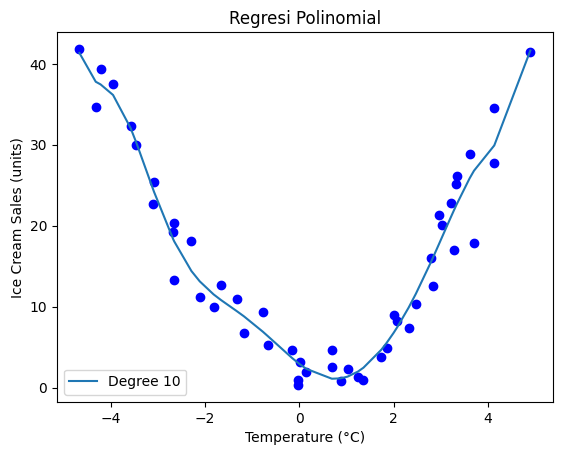

In [19]:
degrees = [2, 4, 6, 8, 10]

for d in degrees:
    poly = PolynomialFeatures(degree=d)
    X_poly = poly.fit_transform(X)
    poly_reg = LinearRegression()
    poly_reg.fit(X_poly, y)
    y_pred_poly = poly_reg.predict(X_poly)
    
    plt.scatter(X, y, color='blue')
    plt.plot(X, y_pred_poly, label=f'Degree {d}')
    plt.title(f'Regresi Polinomial')
    plt.xlabel('Temperature (°C)')
    plt.ylabel('Ice Cream Sales (units)')
    plt.legend()
    plt.show()

Soal 4
Saya bersumpah bahwa saya mengerjakan ini dengan jujur

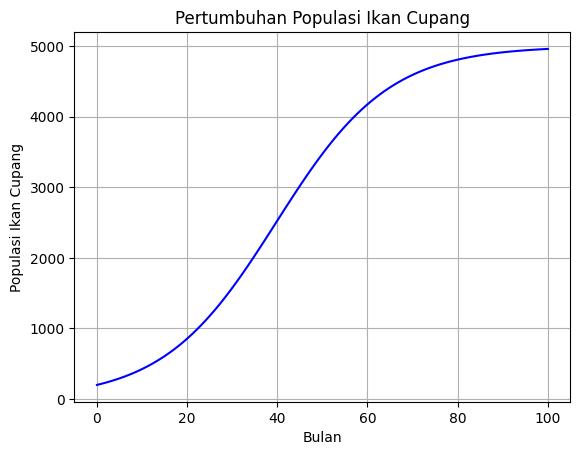

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

def logistic_growth(P, t, r, K):
    return r * P * (1 - P / K)

P0 = 200
r = 0.08
K = 5000
t = np.linspace(0, 100, 100)

P = odeint(logistic_growth, P0, t, args=(r, K))

plt.plot(t, P, color='blue')
plt.title('Pertumbuhan Populasi Ikan Cupang')
plt.xlabel('Bulan')
plt.ylabel('Populasi Ikan Cupang')
plt.grid(True)
plt.show()

Soal 2
Saya bersumpah bahwa saya mengerjakan ini dengan jujur

Intercept: 2.9389
Koefisien: [ 0.04576465  0.18853002 -0.00103749]
R² = 0.8972
MSE = 2.7841
RMSE = 1.6686


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_3364\3362877344.py:36: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


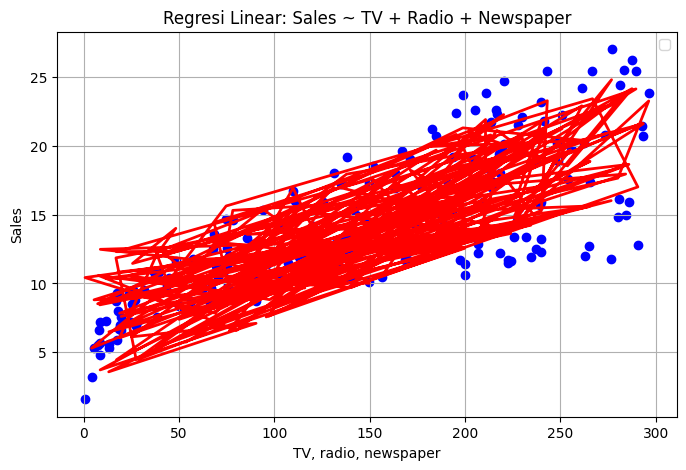

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

data2 = pd.read_csv("C:\\Users\\LENOVO\\Downloads\\Advertising.csv", index_col=0)

X = data2[['TV', 'Radio', 'Newspaper']]
y = data2['Sales']

model2 = LinearRegression()
model2.fit(X, y)

intercept = model2.intercept_
coef = model2.coef_

print(f"Intercept: {intercept:.4f}")
print(f"Koefisien: {coef}")

y_pred2 = model2.predict(X)
r2 = r2_score(y, y_pred2)
mse = mean_squared_error(y, y_pred2)
rmse = np.sqrt(mse)

print(f"R² = {r2:.4f}")
print(f"MSE = {mse:.4f}")
print(f"RMSE = {rmse:.4f}")

plt.figure(figsize=(8, 5))
plt.scatter(data2['TV'], y, color='blue')
plt.plot(data2['TV'], model2.predict(X), color='red', linewidth=2)
plt.title("Regresi Linear: Sales ~ TV + Radio + Newspaper")
plt.xlabel("TV, radio, newspaper")
plt.ylabel("Sales")
plt.legend()
plt.grid(True)
plt.show()


Model regresi berganda lebih baik dibanding model sederhana karena termasuk pengaruh dari semua media iklan. Tapi sulit diinterpretrasi secara visual
Namun, model regresi linear sederhana (Sales ~ TV) sudah cukup jelas menunjukkan arah hubungan positif antara iklan TV dan penjualan.

Soal 5
Saya bersumpah bahwa saya mengerjakan ini dengan jujur


In [ ]:

import pandas as pd
from scipy import interpolate

data = pd.read_csv("C:\\Users\\LENOVO\\Downloads\\industrial_fault_detection_data_1000.csv")

#  5 data teratas dan terbawah
print("5 data teratas:")
print(data.head())
print("\n5 data terbawah:")
print(data.tail())

# Hitung jumlah nilai null
print(data.isnull().sum())
# Dimensi data
print("\nDimensi data:", data.shape)
#Cek data duplikat
print("\nJumlah data duplikat:", data.duplicated().sum())
# Persebaran data
print("\nPersebaran data:")
print(data.describe())

data['Timestamp'] = pd.to_datetime(data['Timestamp'])

data['minutes'] = (data['Timestamp'] - data['Timestamp'].iloc[0]).dt.total_seconds() / 60

x = data['minutes']
y = data['Temperature (°C)']


f_linear = interpolate.interp1d(x, y, kind='linear')
f_quad = interpolate.interp1d(x, y, kind='quadratic')
f_cubic = interpolate.interp1d(x, y, kind='cubic')

#Prediiksi temperatur
print("\nHasil Interpolasi:")
print("Linear (1.5 menit):", float(f_linear(1.5)))
print("Quadratic (2.5 menit):", float(f_quad(2.5)))
print("Cubic (3.5 menit):", float(f_cubic(3.5)))

5 data teratas:
             Timestamp  Vibration (mm/s)  Temperature (°C)  Pressure (bar)  \
0  2023-03-10 00:00:00          0.437086         64.810634        7.785117   
1  2023-03-10 00:01:00          0.955643         93.352076        7.740936   
2  2023-03-10 00:02:00          0.758795        119.835667        9.718764   
3  2023-03-10 00:03:00          0.638793        108.577991        7.748639   
4  2023-03-10 00:04:00          0.240417        114.524892        7.815849   

   RMS Vibration  Mean Temp  Fault Label  
0       0.601657  90.561384            1  
1       0.601657  90.561384            1  
2       0.601657  90.561384            0  
3       0.601657  90.561384            1  
4       0.601657  90.561384            0  

5 data terbawah:
               Timestamp  Vibration (mm/s)  Temperature (°C)  Pressure (bar)  \
995  2023-03-10 16:35:00          0.182424        102.556413        9.595887   
996  2023-03-10 16:36:00          0.925582        126.529170        7.471820   

Soal 6
Saya bersumpah bahwa saya mengerjakan ini dengan jujur


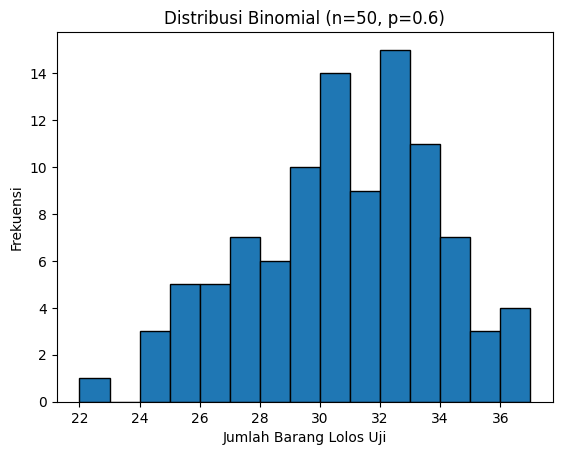

In [ ]:

import numpy as np
import matplotlib.pyplot as plt


# b. Distribusi Binomial
n, p = 50, 0.6
data_binom = np.random.binomial(n, p, 100)


